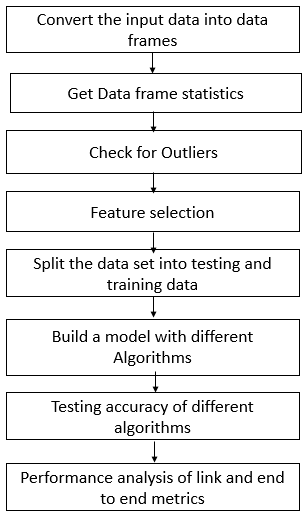

'[image.png]' is not recognized as an internal or external command,
operable program or batch file.


### Above given is the flow diagram for Data analysis. In the first part of data analysis, the collected data is converted into data frames. The data frames makes the operation on the dataset easier. After that, the statistics of the dataset is obtained to determine the mean, maximum, and minimum values. The box plot in this case is used to check for outliers and distribution of the data set. All the features are not suitable for the machine learning algorithm. The features are filtered out using the feature selection method. In this case, the selecKbest method is used. Once the features are finalised, the data is converted into training and testing dataset. In this case, the data set is converted in the ratio of 80% training dataset and 20% testing dataset. The model is built using different algorithms. Three algorithms are selected in this case - KNN,Decision tree and Linear regression. After building the model, the accuracy of the model is analysed using R2 score and Mean square error. In the last part of data analysis, the performance is checked for link and end to end metrics.

In [ ]:
#Importing the required librabries in the assignament.
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import requests
from pandas import DataFrame

In [2]:
test_data = pd.read_csv('Testingsheet_ML_3.csv') #Reading the csv file

In [3]:
 #We need to find the missing values in the csv file
test_data.isnull().sum()

Test Cases              0
Bandwidth S1 to S2      0
delay S1 to S2          0
loss S1 to S2           0
Bandwidth S1 to S2.1    0
delay S1 to S3          0
loss S1 to S3           0
Banwidth S1 to S3       0
jitter S1 to S3         0
latency S1 to S3        0
Banwidth S2 to S1       0
jitter S2 to S1         0
latency S2 to S1        0
Banwidth S2 to S3       0
jitter S2 to S3         0
latency S2 to S3        0
Pesq NB                 0
dtype: int64

In [4]:
test_data.dtypes.value_counts()#It is showing the number of columns and its data types

float64    13
int64       3
object      1
dtype: int64

In [5]:
Datainfo = test_data[["Banwidth S1 to S3","Banwidth S2 to S1","Banwidth S2 to S3"]]#the data which is need to be considered for further operations 
print(Datainfo.describe())#The information of the data which is chosen in the pervious step

       Banwidth S1 to S3  Banwidth S2 to S1  Banwidth S2 to S3
count          60.000000          60.000000          60.000000
mean           39.778833          45.343333          49.478333
std            13.317469          12.989714          12.923492
min             4.830000          24.400000          24.500000
25%            29.125000          34.275000          34.375000
50%            38.600000          49.100000          54.000000
75%            51.200000          56.225000          58.800000
max            60.500000          63.700000          76.100000


In [6]:
Datainfo2 = test_data[["latency S1 to S3","latency S2 to S1","latency S2 to S3"]]#the data which is need to be considered for further operations 
print(Datainfo2.describe())#The information of the data which is chosen in the pervious step

       latency S1 to S3  latency S2 to S1  latency S2 to S3
count         60.000000          60.00000         60.000000
mean          15.978333           8.58500          7.143333
std            8.633677           6.85293          6.413872
min            0.000000           0.00000          0.000000
25%           11.750000           1.95000          1.800000
50%           16.000000           7.10000          5.400000
75%           22.000000          14.00000         12.000000
max           41.000000          22.00000         27.000000


In [7]:
Datainfo3 = test_data[["jitter S1 to S3","jitter S2 to S1","jitter S2 to S3"]]#the data which is need to be considered for further operations 
print(Datainfo3.describe())#The information of the data which is chosen in the pervious step

       jitter S1 to S3  jitter S2 to S1  jitter S2 to S3
count        60.000000        60.000000        60.000000
mean        144.261750       111.795267        87.894938
std         117.666893       107.605163        96.145735
min           0.000000         0.380000         0.203000
25%          40.747750        18.800250        13.600000
50%         128.991000        81.688000        44.802000
75%         219.655500       186.115750       152.433750
max         407.884000       367.038000       362.052000


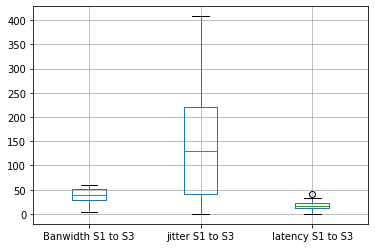

In [8]:
CombineCsv_data_month = test_data[["Banwidth S1 to S3","jitter S1 to S3","latency S1 to S3"]]
boxplot = CombineCsv_data_month.boxplot(column=["Banwidth S1 to S3","jitter S1 to S3","latency S1 to S3"])

<Figure size 432x288 with 0 Axes>

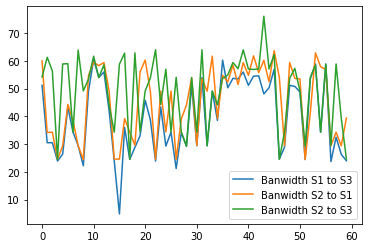

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
Datainfo.plot()
plt.show()



<Figure size 432x288 with 0 Axes>

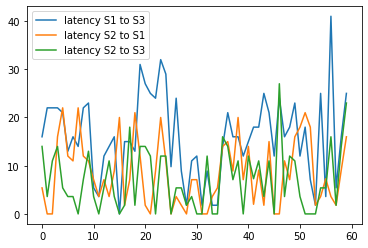

In [10]:
Datainfo2 = test_data[["latency S1 to S3","latency S2 to S1","latency S2 to S3"]]#
plt.figure()
Datainfo2.plot()
plt.show()

## Scatter plots of different feature with PESQ

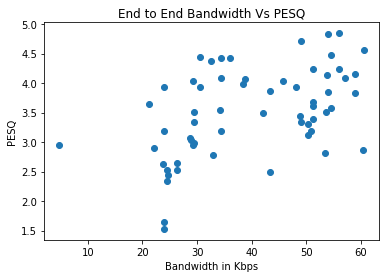

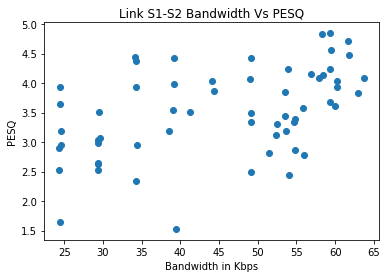

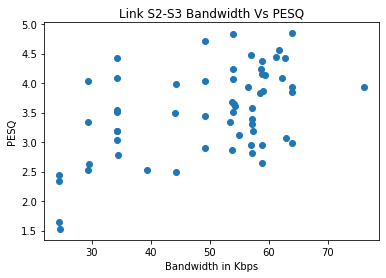

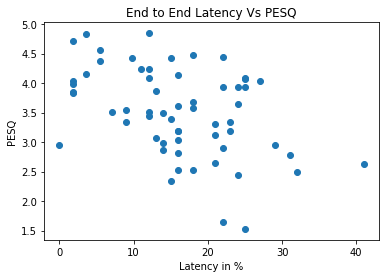

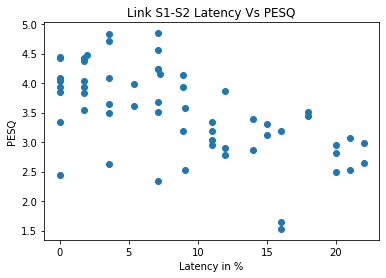

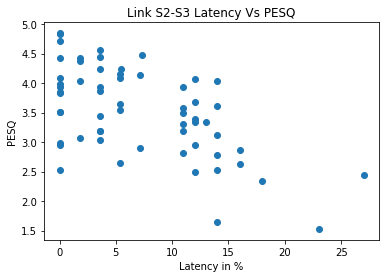

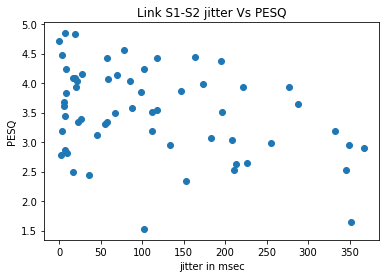

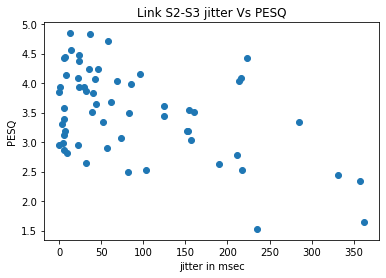

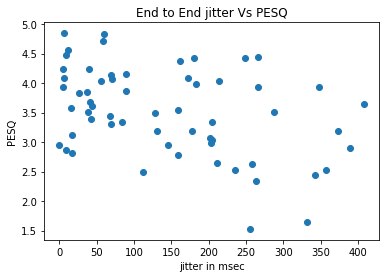

In [11]:
fig, ax = plt.subplots()
ax.scatter(test_data['Banwidth S1 to S3'],test_data['Pesq NB'])
plt.title("End to End Bandwidth Vs PESQ")
plt.ylabel("PESQ")
plt.xlabel("Bandwidth in Kbps")
plt.show()

fig, ax1 = plt.subplots()
ax1.scatter(test_data['Banwidth S2 to S1'],test_data['Pesq NB'])
plt.title("Link S1-S2 Bandwidth Vs PESQ")
plt.ylabel("PESQ")
plt.xlabel("Bandwidth in Kbps")
plt.show()

fig, ax2 = plt.subplots()
ax2.scatter(test_data['Banwidth S2 to S3'],test_data['Pesq NB'])
plt.title("Link S2-S3 Bandwidth Vs PESQ")
plt.ylabel("PESQ")
plt.xlabel("Bandwidth in Kbps")
plt.show()

fig, ax3 = plt.subplots()
ax3.scatter(test_data['latency S1 to S3'],test_data['Pesq NB'])
plt.title("End to End Latency Vs PESQ")
plt.ylabel("PESQ")
plt.xlabel("Latency in %")
plt.show()

fig, ax4 = plt.subplots()
ax4.scatter(test_data['latency S2 to S1'],test_data['Pesq NB'])
plt.title("Link S1-S2 Latency Vs PESQ")
plt.ylabel("PESQ")
plt.xlabel("Latency in %")
plt.show()

fig, ax5 = plt.subplots()
ax5.scatter(test_data['latency S2 to S3'],test_data['Pesq NB'])
plt.title("Link S2-S3 Latency Vs PESQ")
plt.ylabel("PESQ")
plt.xlabel("Latency in %")
plt.show()

fig, ax6 = plt.subplots()
ax6.scatter(test_data['jitter S2 to S1'],test_data['Pesq NB'])
plt.title("Link S1-S2 jitter Vs PESQ")
plt.ylabel("PESQ")
plt.xlabel("jitter in msec")
plt.show()


fig, ax7 = plt.subplots()
ax7.scatter(test_data['jitter S2 to S3'],test_data['Pesq NB'])
plt.title("Link S2-S3 jitter Vs PESQ")
plt.ylabel("PESQ")
plt.xlabel("jitter in msec")
plt.show()


fig, ax8 = plt.subplots()
ax8.scatter(test_data['jitter S1 to S3'],test_data['Pesq NB'])
plt.title("End to End jitter Vs PESQ")
plt.ylabel("PESQ")
plt.xlabel("jitter in msec")
plt.show()

## For End to End Metrics

In [12]:
#End to end matrix

Endtoend = test_data[["Banwidth S1 to S3","jitter S1 to S3","latency S1 to S3"]] #fetching the data from the column Review Comment
pesqdata = test_data["Pesq NB"] #fetching the data from the column Nature of Rating

#Dividing the data into traning and testing dataset 
trainingData, testingData, trainingpesq, testingpesq = train_test_split(Endtoend, pesqdata, test_size=0.2)

In [13]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
# feature selection
def select_features(X_train_data, y_train_data, X_test_data):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train_data, y_train_data)
    # transform train input data
    X_train_data_fs = fs.transform(X_train_data)
    # transform test input data
    X_test_data_fs = fs.transform(X_test_data)
    return X_train_data_fs, X_test_data_fs, fs


Feature 0: 19.087448
Feature 1: 12.322646
Feature 2: 9.447914


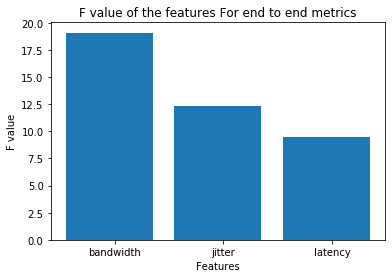

In [14]:
X_train_fs, X_test_fs, fs = select_features(trainingData,trainingpesq, testingData)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
feature=["bandwidth","jitter","latency"]
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks([i + 0.05 for i in range(3)], ["bandwidth","jitter","latency"])
plt.title("F value of the features For end to end metrics")
plt.ylabel("F value")
plt.xlabel("Features")
pyplot.show()

## Implementation of different Algorithms on End to End Metrics

In [15]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import max_error,explained_variance_score,mean_squared_error
import sklearn.metrics as sm
Mes=[]
R2send=[]
algo=["Decision Tree","KNN","Linear Regression"]
classifiers = [
    tree.DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=3),
    linear_model.LinearRegression()]
    
for item in classifiers:
    clf = item
    clf.fit(trainingData, trainingpesq)
    pred = clf.predict(testingData)
    Mes.append(sm.mean_squared_error(testingpesq, pred))
    R2send.append(((sm.r2_score(testingpesq, pred))*100))

#print(testingpesq)

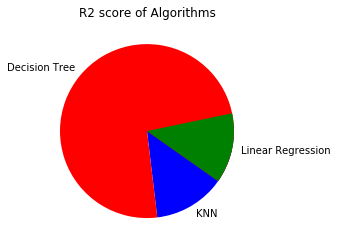

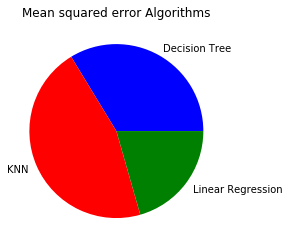

In [16]:
plt.figure()
mycolor=["blue","red","green"]
p = plt.pie(R2send, labels=algo, colors=mycolor)
plt.title("R2 score of Algorithms")
plt.show()
plt.figure()
mycolor=["blue","red","green"]
p = plt.pie(Mes, labels=algo, colors=mycolor)
plt.title("Mean squared error Algorithms")
plt.show()

In [17]:
link = test_data[["Banwidth S2 to S1","jitter S2 to S1","latency S2 to S1","Banwidth S2 to S3","jitter S2 to S3","latency S2 to S3"]] #fetching the data from the column Review Comment
pesqdata = test_data["Pesq NB"] #fetching the data from the column Nature of Rating


#Dividing the data into traning and testing dataset 
trainingData, testingData, trainingpesq, testingpesq = train_test_split(link, pesqdata, test_size=0.2)

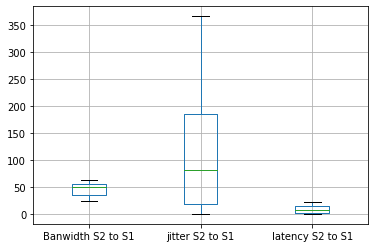

In [18]:
boxplot = link.boxplot(column=["Banwidth S2 to S1","jitter S2 to S1","latency S2 to S1"])


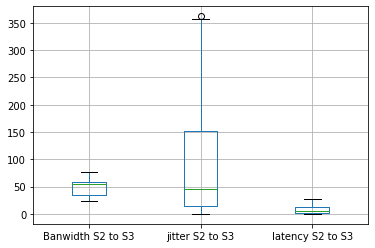

In [19]:
boxplot = link.boxplot(column=["Banwidth S2 to S3","jitter S2 to S3","latency S2 to S3"])

## For Link Metrics

In [20]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
# feature selection
def select_features(X_train_data, y_train_data, X_test_data):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train_data, y_train_data)
    # transform train input data
    X_train_data_fs = fs.transform(X_train_data)
    # transform test input data
    X_test_data_fs = fs.transform(X_test_data)
    return X_train_data_fs, X_test_data_fs, fs


Feature 0: 8.091421
Feature 1: 2.484120
Feature 2: 20.113979
Feature 3: 12.740239
Feature 4: 9.200443
Feature 5: 34.123186


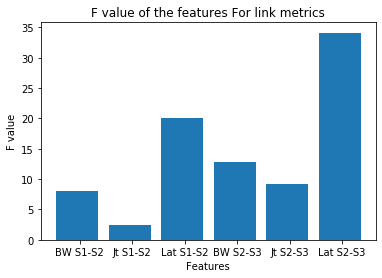

In [21]:
X_train_fs, X_test_fs, fs = select_features(trainingData,trainingpesq, testingData)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks([i + 0.05 for i in range(6)], ["BW S1-S2","Jt S1-S2","Lat S1-S2","BW S2-S3","Jt S2-S3","Lat S2-S3"])
plt.title("F value of the features For link metrics")
plt.ylabel("F value")
plt.xlabel("Features")
pyplot.show()

## Implementation of different Algorithms on Link Metrics

In [22]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import max_error,explained_variance_score,mean_squared_error
import sklearn.metrics as sm
Mnaelink=[]
Mes=[]
Mdae=[]
Evs=[]
R2slink=[]
algo=["Decision Tree","KNN","Linear Regression"]
classifiers = [
    tree.DecisionTreeRegressor(),
    KNeighborsRegressor(n_neighbors=3),
    linear_model.LinearRegression()]
    
for item in classifiers:
    clf = item
    clf.fit(trainingData, trainingpesq)
    pred = clf.predict(testingData)
    Mes.append(sm.mean_squared_error(testingpesq, pred))
    R2slink.append(((sm.r2_score(testingpesq, pred))*100))

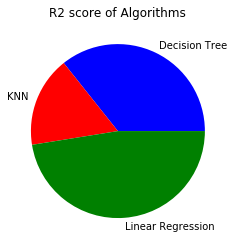

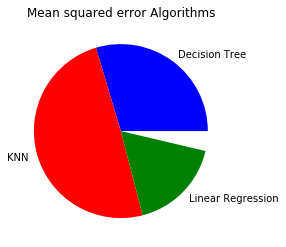

In [23]:
plt.figure()
mycolor=["blue","red","green"]
p = plt.pie(R2slink, labels=algo, colors=mycolor)
plt.title("R2 score of Algorithms")
plt.show()
plt.figure()
mycolor=["blue","red","green"]
p = plt.pie(Mes, labels=algo, colors=mycolor)
plt.title("Mean squared error Algorithms")
plt.show()

## View of decision tree

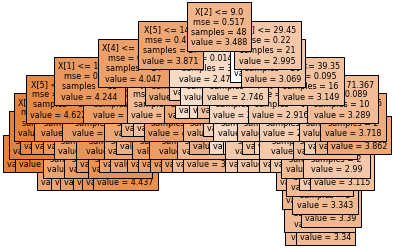

In [24]:
from sklearn import tree
plt.figure()
clf = tree.DecisionTreeRegressor().fit(trainingData, trainingpesq)
tree.plot_tree(clf, filled=True,fontsize=8)
plt.show()

## Performance of end to end and link metrics over the algorithms

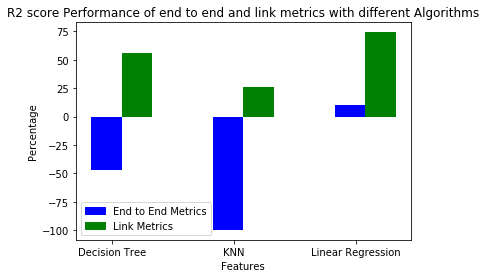

In [25]:
X = np.arange(3)
plt.bar(X + 0.00, R2send, color = 'b', width = 0.25)
plt.bar(X + 0.25, R2slink, color = 'g', width = 0.25)
plt.xticks([i + 0.05 for i in range(3)], ["Decision Tree","KNN","Linear Regression"])
colors = {'End to End Metrics':'blue', 'Link Metrics':'green'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title("R2 score Performance of end to end and link metrics with different Algorithms")
plt.ylabel("Percentage")
plt.xlabel("Features")
plt.show()